### 1. Load Datasets
Loading test, train and validation sets into pandas dataframe

In [2]:
import pandas as pd

df_train = pd.read_json('../data/raw/train.json', lines=True)
df_test = pd.read_json('../data/raw/test.json', lines=True)
df_validation = pd.read_json('../data/raw/validation.json', lines=True)

#### Analyzing training dataset

In [3]:
df_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   quality_checked  1112 non-null   object
 1   text             1112 non-null   str   
 2   task             1112 non-null   str   
 3   meta             1112 non-null   object
 4   doc_id           1112 non-null   str   
 5   dataset_type     1112 non-null   str   
 6   annotator_id     1112 non-null   str   
 7   entity_mentions  1112 non-null   object
dtypes: object(3), str(5)
memory usage: 69.6+ KB


Observed no null values

In [4]:
df_train.head()

,quality_checked,text,task,meta,doc_id,dataset_type,annotator_id,entity_mentions
0,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator1,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator2,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
2,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator8,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
3,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator11,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
4,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741,train,annotator1,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."


Observation: We do not need dataset_type because the test, train and validation files are already separate. We also do not need the columns quality_checked, annotator_id.

Dropping unrequired columns.

In [5]:
df_train.drop(columns=['quality_checked', 'dataset_type', 'annotator_id'])

,text,task,meta,doc_id,entity_mentions
0,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
2,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
3,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
4,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
...,...,...,...,...,...
1107,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Helmut Ludescher', 'articles': ...",001-60002,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1108,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'J. Peter', 'articles': [91, 34,...",001-146353,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1109,PROCEDURE\n\nThe case was referred to the Cour...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Christopher Ian Scott', 'articl...",001-58010,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1110,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henryk Kreuz', 'articles': [91,...",001-61921,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."


Analyzing task column

In [6]:
df_train['task'].unique()

<StringArray>
[       'Task: Annotate the document to anonymise the following person: Henrik Hasslund',
            'Task: Annotate the document to anonymise the following person: D. Stępniak',
         'Task: Annotate the document to anonymise the following person: Nusret Amutgan',
           'Task: Annotate the document to anonymise the following person: Mustafa Sarı',
      'Task: Annotate the document to anonymise the following person: Dariusz Karwowski',
         'Task: Annotate the document to anonymise the following person: İlhan Karakurt',
        'Task: Annotate the document to anonymise the following person: Artur Warsiński',
   'Task: Annotate the document to anonymise the following person: Włodzimierz Majewski',
         'Task: Annotate the document to anonymise the following person: İlhami Erseven',
            'Task: Annotate the document to anonymise the following person: Semir Güzel',
 ...
       'Task: Annotate the document to anonymise the following person: Zekeriya K

Observation: we don't need the task column

Finding out how many unique values are there in text column and doc_id column. Making sure they match.

In [7]:
len(df_train['text'].unique())

1014

In [8]:
len(df_train['doc_id'].unique())

1014

Observation: We have 1014 unique values for documents but the dataset has 1112 entries. So there might be duplicates.

In [9]:
df_train['meta'][0]

{'applicant': 'Henrik Hasslund',
 'articles': [91, 34, 54, 34, 93],
 'countries': 'DNK',
 'legal_branch': 'CHAMBER',
 'year': 2008}

Observation: We may be able to reserve this column for later evaluation. Might be helpful to find out if our model struggles with region specific names, or has a bias, etc.

In [10]:
df_train_meta = df_train[['text', 'meta', 'doc_id']].copy()
df_train_meta.head()

,text,meta,doc_id
0,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
1,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
2,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
3,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
4,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741


In [11]:
df_train_meta.to_csv('../data/processed/train_meta.csv')

In [12]:
df_test_meta = df_test[['text', 'meta', 'doc_id']].copy()
df_test_meta.to_csv('../data/processed/test_meta.csv')

df_validation_meta = df_validation[['text', 'meta', 'doc_id']].copy()
df_validation_meta.to_csv('../data/processed/validation_meta.csv')

Exploring entity mentions column

In [13]:
df_train['entity_mentions'][1]

[{'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 62,
  'entity_id': '001-90194_a2_e1',
  'entity_mention_id': '001-90194_a2_em1',
  'entity_type': 'CODE',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': '36244/06',
  'start_offset': 54},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'correct',
  'end_offset': 94,
  'entity_id': '001-90194_a2_e2',
  'entity_mention_id': '001-90194_a2_em2',
  'entity_type': 'ORG',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': 'Kingdom of Denmark',
  'start_offset': 76},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 242,
  'entity_id': '001-90194_a2_e3',
  'entity_mention_id': '001-90194_a2_em3',
  'entity_type': 'DEM',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': 'Danish',
  'start_offset': 236},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 271,
  '

In [14]:
import json
df_train_exploded = df_train.explode('entity_mentions')
entities_flat = pd.json_normalize(df_train_exploded['entity_mentions'])
df_train_entities = pd.concat([df_train_exploded[['doc_id']].reset_index(drop=True), entities_flat.reset_index(drop=True)], axis=1)

df_train_entities.head()

,doc_id,confidential_status,edit_type,end_offset,entity_id,entity_mention_id,entity_type,identifier_type,related_mentions,span_text,start_offset
0,001-90194,NOT_CONFIDENTIAL,check,62,001-90194_a1_e1,001-90194_a1_em1,CODE,DIRECT,None,36244/06,54
1,001-90194,NOT_CONFIDENTIAL,correct,94,001-90194_a1_e2,001-90194_a1_em2,ORG,NO_MASK,None,Kingdom of Denmark,76
2,001-90194,NOT_CONFIDENTIAL,check,242,001-90194_a1_e3,001-90194_a1_em3,DEM,NO_MASK,None,Danish,236
3,001-90194,NOT_CONFIDENTIAL,check,271,001-90194_a1_e4,001-90194_a1_em4,PERSON,DIRECT,None,Mr Henrik Hasslund,253
4,001-90194,NOT_CONFIDENTIAL,check,308,001-90194_a1_e5,001-90194_a1_em5,DATETIME,QUASI,None,31 August 2006,294


Observation: We have start_offset, end_offset and entity_type. We need to extract this data to create a token and tags for finetuning DistilliBERT model.

Checking the counts of entities for filtered set where identifier_type is not NO_MASK

Entity Type Counts:


<Axes: title={'center': 'Distribution of Entity Types'}, xlabel='entity_type'>

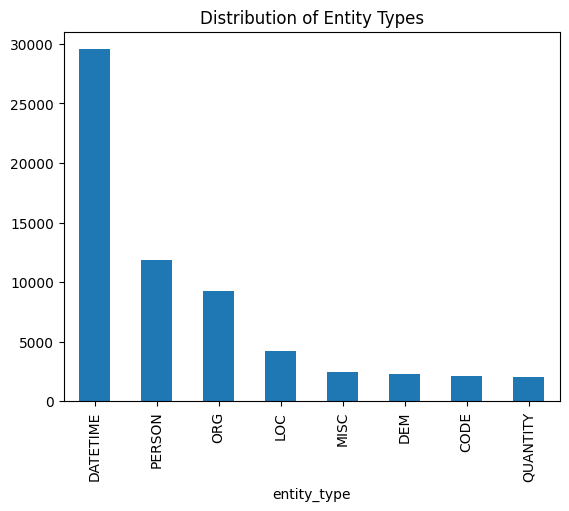

In [ ]:
print("Entity Type Counts:")
entity_type_stats = df_train_entities[df_train_entities['identifier_type'] != 'NO_MASK']['entity_type'].value_counts()
entity_type_stats.plot(kind='bar', title='Distribution of Entity Types')

Certain imbalance of data is seen here where datetime entities are much higher in count than quantity or code

<Axes: title={'center': 'Distribution of Masking Needs'}, xlabel='identifier_type'>

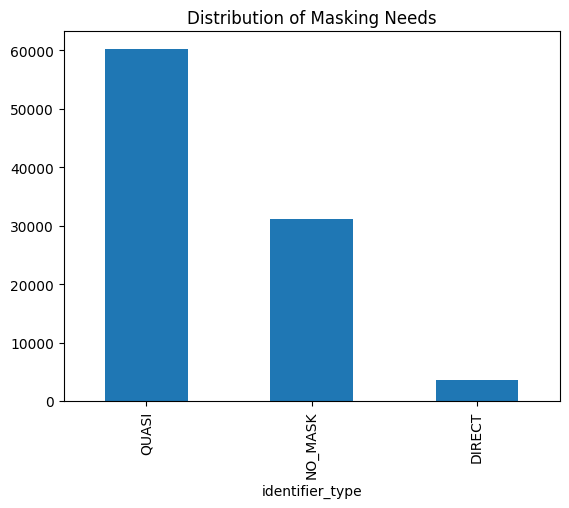

In [18]:
# Check masking requirements
mask_stats = df_train_entities['identifier_type'].value_counts()
mask_stats.plot(kind='bar', title='Distribution of Masking Needs')

<Axes: title={'center': 'Entities per Document Distribution'}, xlabel='Number of Entities', ylabel='Number of Documents'>

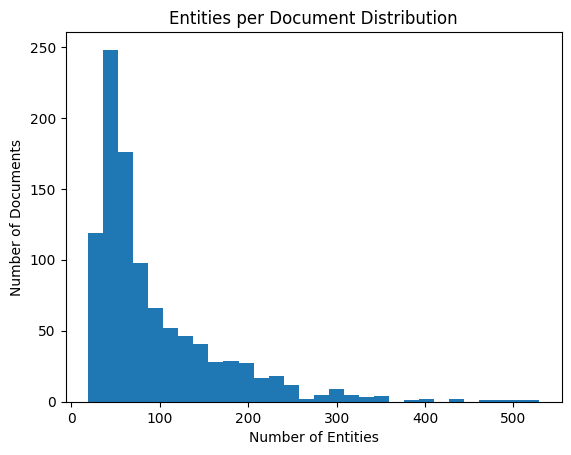

In [19]:
entities_per_doc = df_train_entities.groupby('doc_id').size().sort_values(ascending=False)
entities_per_doc.plot(kind='hist', bins=30, title='Entities per Document Distribution', xlabel='Number of Entities', ylabel='Number of Documents')

In [24]:
print(f"Average entities per document: {entities_per_doc.mean():.2f}")

Average entities per document: 93.72


Using DistilBERT tokenizer

In [25]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

ModuleNotFoundError: No module named 'transformers'

In [ ]:
def get_tokens_and_tags(row):
    text = row['text']
    entities = row['entity_mentions']
    
    tags = ["O"] * len(text)
    for ent in entities:
        if ent['identifier_type'] == 'NO_MASK': continue #filtering NO_MASK as we don't need to redact this identifier_type
        start, end, label = ent['start_offset'], ent['end_offset'], ent['entity_type']
        if start < len(text):
            tags[start] = f"B-{label}"
            for i in range(start+1, end): tags[i] = f"I-{label}"
            
    # Simple whitespace tokenization (Replace with tokenizer logic for best results)
    tokens_list = text.split()
    ner_tags_list = []
    
    current_char = 0
    for token in tokens_list:
        while current_char < len(text) and text[current_char].isspace():
            current_char += 1
        ner_tags_list.append(tags[current_char] if current_char < len(text) else "O")
        current_char += len(token)
        
    # Return as a Series to create two new columns automatically
    return pd.Series([tokens_list, ner_tags_list], index=['tokens', 'ner_tags'])

,quality_checked,text,task,meta,doc_id,dataset_type,annotator_id,entity_mentions
0,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator1,"{'confidential_status': 'NOT_CONFIDENTIAL', 'e..."
0,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator1,"{'confidential_status': 'NOT_CONFIDENTIAL', 'e..."
0,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator1,"{'confidential_status': 'NOT_CONFIDENTIAL', 'e..."
0,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator1,"{'confidential_status': 'NOT_CONFIDENTIAL', 'e..."
0,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator1,"{'confidential_status': 'NOT_CONFIDENTIAL', 'e..."
